<a href="https://colab.research.google.com/github/hikaru-okinawa/lodging_price/blob/second-commit/lodging_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ライブラリーをインポート

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#データの読み込み

In [296]:
#データの読み込み
df_train_lodging = pd.read_csv('/content/drive/MyDrive/python_for_beginner/民泊サービス/train.csv')
df_test_lodging = pd.read_csv('/content/drive/MyDrive/python_for_beginner/民泊サービス/test.csv')

#データの加工

In [297]:
#学習データのサイズの確認
df_train_lodging.shape
df_train_lodging.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [298]:
df_train_lodging.shape

(55583, 29)

In [299]:
#テストデータのサイズの確認
df_test_lodging.shape
df_test_lodging.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,...,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,...,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,...,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,...,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,...,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [300]:
#学習データのデータ型の確認
df_train_lodging.dtypes

id                          int64
accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
thumbnail_url              object
zipcode                    object
y                         float64
dtype: object

##特徴量の選択
------------------


In [301]:
df_train_lodging = df_train_lodging.drop(columns=['amenities',
                                                  'description',
                                                  'name', 'thumbnail_url',
                                                  'zipcode', 'first_review',
                                                  'host_since', 'last_review',
                                                  'neighbourhood', 'host_response_rate',
                                                  'number_of_reviews', 'instant_bookable',
                                                  'id','cancellation_policy','host_has_profile_pic',
                                                  'host_has_profile_pic', 'host_identity_verified'])


In [302]:
#欠損データの確認(train)
df_train_lodging.isnull().sum()

accommodates                0
bathrooms                 147
bed_type                    0
bedrooms                   71
beds                       96
city                        0
cleaning_fee                0
latitude                    0
longitude                   0
property_type               0
review_scores_rating    12556
room_type                   0
y                           0
dtype: int64

In [303]:
#欠損データの確認(test)
df_test_lodging.isnull().sum()

id                           0
accommodates                 0
amenities                    0
bathrooms                   53
bed_type                     0
bedrooms                    20
beds                        35
cancellation_policy          0
city                         0
cleaning_fee                 0
description                  0
first_review              3956
host_has_profile_pic        40
host_identity_verified      40
host_response_rate        4595
host_since                  40
instant_bookable             0
last_review               3947
latitude                     0
longitude                    0
name                         0
neighbourhood             1712
number_of_reviews            0
property_type                0
review_scores_rating      4166
room_type                    0
thumbnail_url             2071
zipcode                    250
dtype: int64

In [304]:
#欠損データの削除
df_train_lodging = df_train_lodging.dropna()

In [305]:
#欠損データを削除した後のデータのサイズの確認
df_train_lodging.shape

(42828, 13)

In [306]:
#データのコピー
df_train_lodging1 = df_train_lodging.copy()

In [307]:
#コラムリスト
columns_list = df_train_lodging1.columns
print(columns_list)

Index(['accommodates', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'city',
       'cleaning_fee', 'latitude', 'longitude', 'property_type',
       'review_scores_rating', 'room_type', 'y'],
      dtype='object')


#float列をintに変換

In [308]:
# # float型からint型に変換
# df_train_lodging1['bathrooms'] = df_train_lodging1['bathrooms'].astype(int)
# df_train_lodging1['bedrooms'] = df_train_lodging1['bedrooms'].astype(int)
# df_train_lodging1['beds'] = df_train_lodging1['beds'].astype(int)
# df_train_lodging1['latitude'] = df_train_lodging1['latitude'].astype(int)
# df_train_lodging1['longitude'] = df_train_lodging1['longitude'].astype(int)
# #df_train_lodging1['review_scores_rating'] = df_train_lodging1['review_scores_rating'].astype(int)
# df_train_lodging1['y'] = df_train_lodging1['y'].astype(int)

##特徴量リスト
-------------------

- accommodates
- bathrooms
- bed_type
- bedrooms
- beds
- city
- cleaning_fee
- latitude
- longitude
- property_type
- review_scores_rating
- room_type
- y

#カテゴリ変数を数値化する
----------------------------------


- amenities → 削除
- bed_type → one-hot
- cancellation_policy → label Encoding
- city → one-hot
- cleaning_fee → one-hot
- description → 削除
- first_review → 日付を年、月、日の数値に分割する
- host_has_profile_pic → one-hot
- host_identity_verified → one-hot     
- host_response_rate → label Encoding          
- host_since → 日付を年、月、日の数値に分割する                
- instant_bookable → one-hot            
- last_review → 日付を年、月、日の数値に分割する
- name → 削除
- neighbourhood → one-hot
- property_type → one-hot
- room_type → one-hot                
- thumbnail_url → 削除           
- zipcode → 削除

In [309]:
#bed type onehotエンコーディング
ohe_bed_type = pd.get_dummies(df_train_lodging1['bed_type'], prefix='bed_type')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_bed_type], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['bed_type'])

In [310]:
# #cancellation_policy データを可視化
# plt.figure(figsize=(6, 4))
# sns.countplot(data=df_train_lodging1, x='cancellation_policy')
# #plt.show()

In [311]:
# #cancellation_policy → label Encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_train_lodging1['cancellation_policy'] = le.fit_transform(df_train_lodging1['cancellation_policy'])
# #df_train_lodging1.head()

In [312]:
#city onehotエンコーディング
ohe_city = pd.get_dummies(df_train_lodging1['city'], prefix='city')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_city], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['city'])

In [313]:
#cleaning_fee onehotエンコーディング
ohe_cleaning_fee = pd.get_dummies(df_train_lodging1['cleaning_fee'], prefix='cleaning_fee')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_cleaning_fee], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['cleaning_fee'])

In [314]:
# #host_has_profile_pic onehotエンコーディング
# ohe_host_has_profile_pic = pd.get_dummies(df_train_lodging1['host_has_profile_pic'], prefix='host_has_profile_pic')
# df_train_lodging1 = pd.concat([df_train_lodging1, ohe_host_has_profile_pic], axis=1)
# #bed_typeコラムの削除(文字列)
# df_train_lodging1 = df_train_lodging1.drop(columns=['host_has_profile_pic'])

In [315]:
# #host_identity_verified onehotエンコーディング
# ohe_host_identity_verified = pd.get_dummies(df_train_lodging1['host_identity_verified'], prefix='host_identity_verified')
# df_train_lodging1 = pd.concat([df_train_lodging1, ohe_host_identity_verified], axis=1)
# #bed_typeコラムの削除(文字列)
# df_train_lodging1 = df_train_lodging1.drop(columns=['host_identity_verified'])

In [316]:
#host_response_rate → label Encoding

#df_train_lodging1['host_response_rate'] = le.fit_transform(df_train_lodging1['host_response_rate'])
#df_train_lodging1.head()

In [317]:
# #instant_bookable onehotエンコーディング
# ohe_instant_bookable = pd.get_dummies(df_train_lodging1['instant_bookable'], prefix='instant_bookable')
# df_train_lodging1 = pd.concat([df_train_lodging1, ohe_instant_bookable], axis=1)
# #bed_typeコラムの削除(文字列)
# df_train_lodging1 = df_train_lodging1.drop(columns=['instant_bookable'])

In [318]:
# #neighbourhood onehotエンコーディング
# ohe_neighbourhood = pd.get_dummies(df_train_lodging1['neighbourhood'], prefix='neighbourhood')
# df_train_lodging1 = pd.concat([df_train_lodging1, ohe_neighbourhood], axis=1)
# #bed_typeコラムの削除(文字列)
# df_train_lodging1 = df_train_lodging1.drop(columns=['neighbourhood'])

In [319]:
#property_type onehotエンコーディング
ohe_property_type = pd.get_dummies(df_train_lodging1['property_type'], prefix='property_type')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_property_type], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['property_type'])

In [320]:
#room_type onehotエンコーディング
ohe_room_type = pd.get_dummies(df_train_lodging1['room_type'], prefix='room_type')
df_train_lodging1 = pd.concat([df_train_lodging1, ohe_room_type], axis=1)
#bed_typeコラムの削除(文字列)
df_train_lodging1 = df_train_lodging1.drop(columns=['room_type'])

In [321]:
columns = df_train_lodging1.columns
print(columns)
columns.shape

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude',
       'longitude', 'review_scores_rating', 'y', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'city_Boston', 'city_Chicago', 'city_DC',
       'city_LA', 'city_NYC', 'city_SF', 'cleaning_fee_f', 'cleaning_fee_t',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Castle', 'property_type_Cave',
       'property_type_Chalet', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Earth House',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Hut',
       'property_type_In-law', 'property_type_Island', 'property_type_Loft',
       'property_type_Other', 'property_type_Servi

(56,)

#numpy array 型に変換

In [322]:
t = df_train_lodging1['y'].values

In [323]:
x = df_train_lodging1.drop(labels=['y'], axis=1).values

#学習データと検証データの分割

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [325]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

#データの正規化

In [326]:
sc = StandardScaler()
# sc.fit(x_train)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#線形回帰


In [327]:
#ライブラリーのインポート
from sklearn.linear_model import LinearRegression

# スコア計算のためのライブラリ
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#　モデルの選択
from sklearn.linear_model import SGDClassifier, LinearRegression, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# model = SGDClassifier(loss='log_loss', random_state=0)
model = LinearRegression()
# model = SGDRegressor(max_iter=100, tol=1e-3, penalty=None, eta0=0.01, random_state=0)
# model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
# model = RandomForestRegressor(n_estimators=100, random_state=0)

#モデルの学習
model.fit(x_train, t_train)

# 回帰
model_pred = model.predict(x_test)

# 評価
#学習データの評価
train_score = model.score(x_train, t_train)
print(train_score)
# # 決定係数(R2)
# r2_model = r2_score(t_test, model_pred)

# # 平均絶対誤差(MAE)
# mae_model = mean_absolute_error(t_test, model_pred)

# print("R2 : %.3f" % r2_model)
# print("MAE : %.3f" % mae_model)

# # # 回帰係数
# # print("Coef = ", model.coef_)
# # # 切片
# # print("Intercept =", model.intercept_)



0.5178891331390105


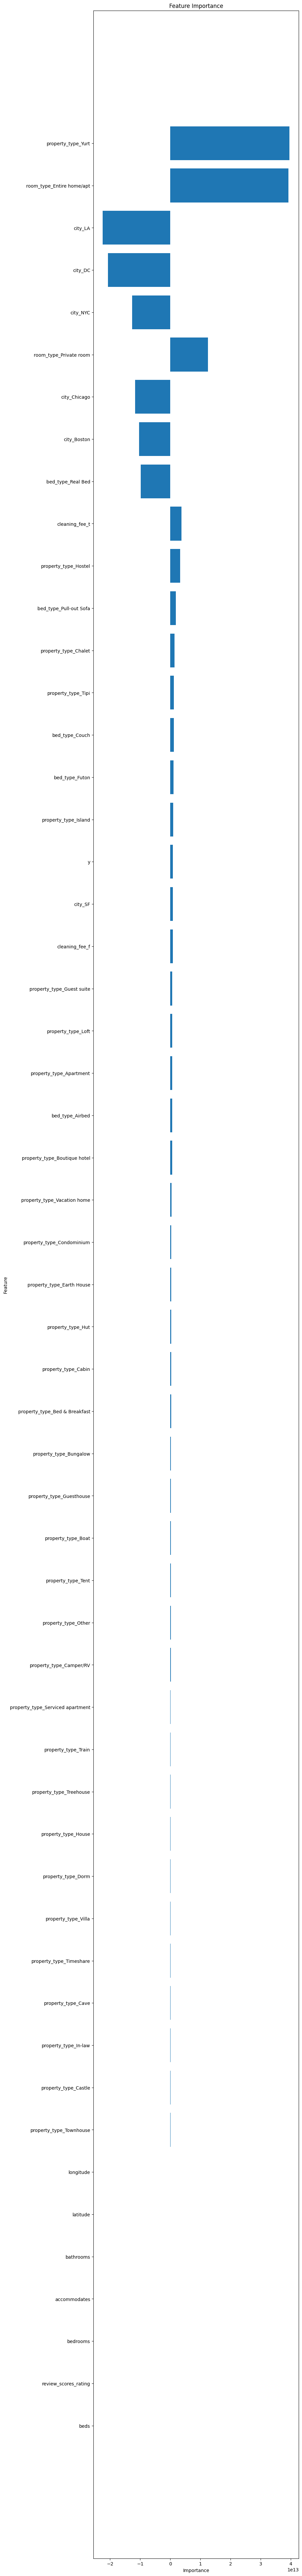

In [328]:
#coef = model.feature_importances_
coef = model.coef_
columns = df_train_lodging1.columns
features_importances = zip(columns, coef)
sorted_features = sorted(features_importances, key=lambda x: abs(x[1]), reverse=True)

# データの準備
labels, values = zip(*sorted_features)
#labels, values = zip(*features_importances)

plt.figure(figsize=(8, 100))
# 棒グラフのプロット
plt.barh(range(len(labels)), values, align='center')
plt.yticks(range(len(labels)), labels)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # グラフを重要度の高い順に表示
plt.show()

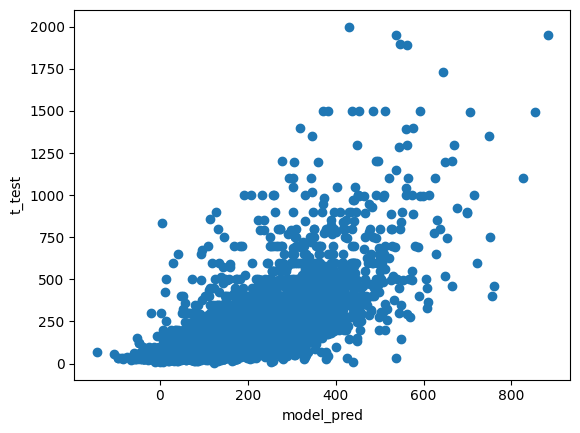

In [329]:
# ライブラリーのインポート
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("model_pred")
plt.ylabel("t_test")
plt.scatter(model_pred, t_test)

plt.show()

#モデルのスコア

In [330]:
train_score = model.score(x_train, t_train)
train_score

0.5178891331390105

In [331]:
val_pred = model.predict(x_test)
from sklearn.metrics import r2_score

In [332]:
# 回帰モデルの評価
val_r2 = r2_score(t_test, val_pred)
print(f'Validation R^2:" {round((val_r2 * 100), 2)}')

Validation R^2:" 50.4
